#                 Titanic survived Project

In [73]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")


In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv files and listing the datas
df_tit = pd.read_csv(r"C:\Users\Premium\Downloads\titanic_train.csv")
df_tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# To know number of columns and rows
df_tit.shape

(891, 12)

In [5]:
#To know the information about each column like the data type, etc we use the info() function.
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
### There are  NULL values present in the dataset.

In [7]:
## to find the exact no of null values we use is null function.
df_tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that we have nan values present in our dataset.

<AxesSubplot:>

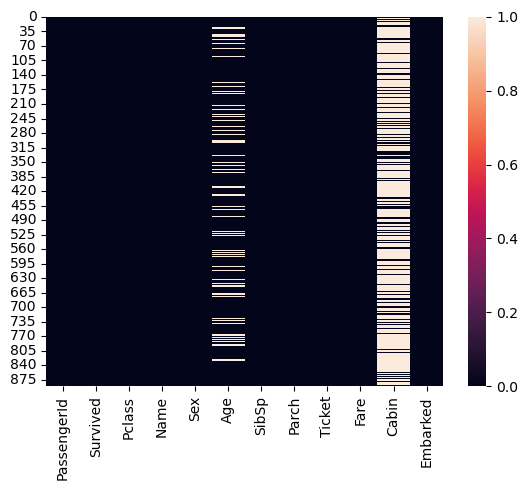

In [8]:
sns.heatmap(df_tit.isnull())

In [13]:
# Lists the statistical summary

df_tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the heatmap we can see the missing values in the dataset.

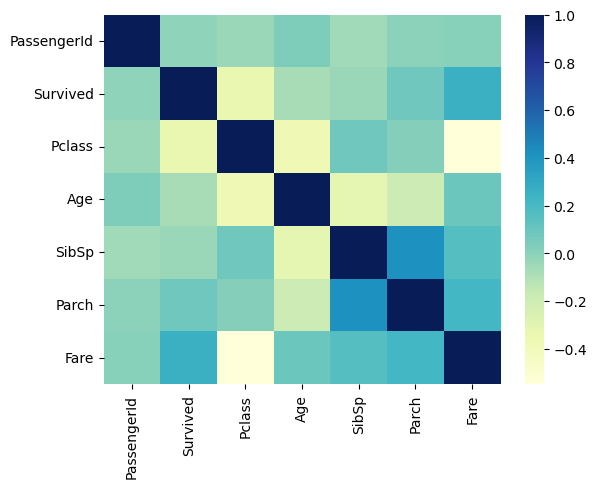

In [11]:
sns.heatmap(df_tit.corr(), cmap="YlGnBu")
plt.show()

# Data Processing

In [31]:
df_tit['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

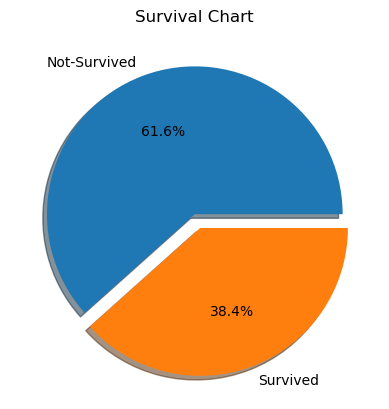

In [32]:
plt.pie(x=df_tit['Survived'].value_counts(),
        labels =['Not-Survived', 'Survived'], explode=[0,0.1],
        autopct='%.01f%%', shadow=True, radius=1)
plt.title('Survival Chart')
plt.show()

#According to Pie chart, we could say in given data only 38.4% Passengers Survived and 61.6% of the people who sailed on the titanic were dead.

In [27]:
## The number of people survived is less when compared with number of people lost their lifes.

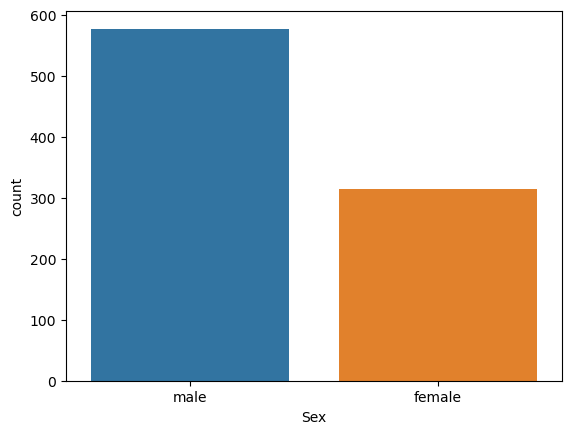

In [16]:
#Checking for type of sex survived
sns.countplot(x='Sex',data=df_tit)
plt.show()

In [26]:
df_tit.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

##Females have much higher survival rate than males in each Class.

# Passenger class survival charts:Pclass

In [34]:
survival_by_clas=df_tit.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_clas)



Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


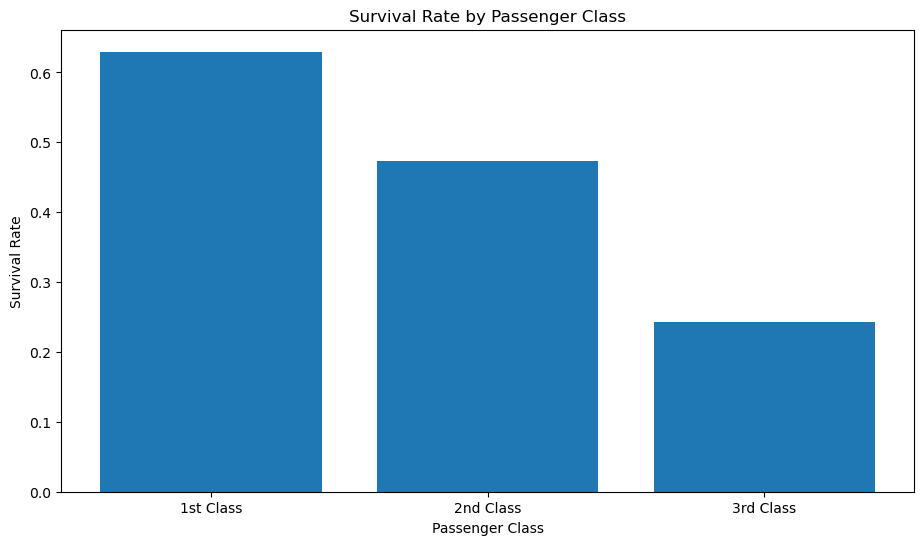

In [37]:
# Visualize survival rates by passenger class
plt.figure(figsize=(11, 6))
plt.bar(survival_by_clas.index, survival_by_clas.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(survival_by_clas.index, labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()
     

In [38]:
## A lot of Passengers are from Class 3 have lowest survival Rate among all classes. 
## Class 1 has higher survival rate.

# Family Survival rates

In [40]:
# Investigate family relationships by analyzing the number of siblings/spouses (SibSp) and parents/children (Parch) on board.
#Determine if having family members on board affected survival rates.

In [41]:
# Investigate family relationships by analyzing SibSp and Parch
# Combine SibSp and Parch to create a 'FamilySize' feature
df_tit['FamilySize'] = df_tit['SibSp'] + df_tit['Parch']

In [42]:
# Analyze the distribution of family sizes
family_size_distribution = df_tit['FamilySize'].value_counts()
print("Family Size Distribution:")
print(family_size_distribution)
     

Family Size Distribution:
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64


In [43]:
# Calculate survival rates by family size
survival_by_family_size = df_tit.groupby('FamilySize')['Survived'].mean()
print("\nSurvival Rate by Family Size:")
print(survival_by_family_size)



Survival Rate by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


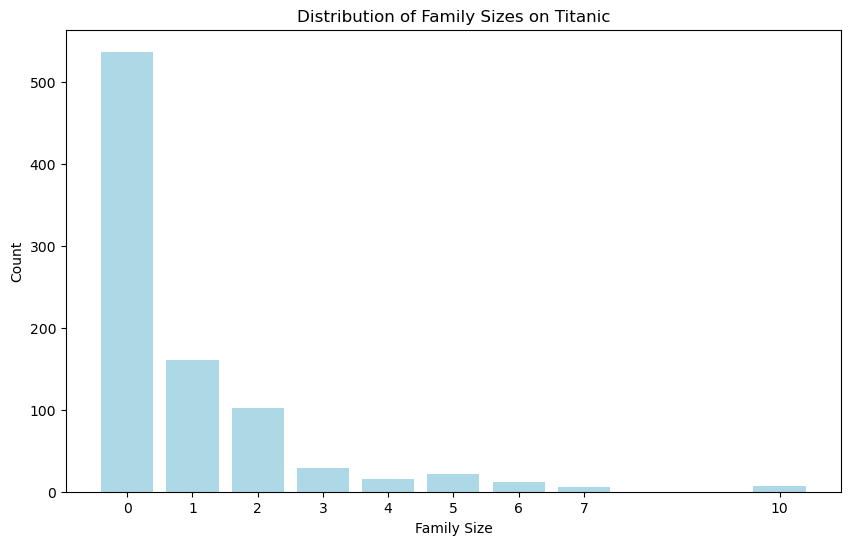

In [44]:
# Visualize the distribution of family sizes
plt.figure(figsize=(10, 6))
plt.bar(family_size_distribution.index, family_size_distribution.values, color='lightblue')
plt.title('Distribution of Family Sizes on Titanic')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(family_size_distribution.index)
plt.show()

# Data Cleaning

In [45]:
#Removing the missing values from the data with appropriate method.

In [47]:
df_tit['Age'].fillna(df_tit['Age'].median(),inplace=True)
df_tit['Cabin'].fillna(df_tit['Cabin'].mode(),inplace=True)
df_tit['Embarked'].fillna(df_tit['Embarked'].mode(),inplace=True)

In [48]:
df_tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
FamilySize       0
dtype: int64

In [49]:
df_tit.dropna(inplace=True)

In [50]:
df_tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [51]:
df_tit.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,0
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S,0
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S,0
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,28.0,1,0,19996,52.0000,C126,S,1
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,0
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [52]:
## there are no null values inthis data

# Label Encoding

We have seen that some of the columns in the dataset are present in string format, we are converting it in intger format using Label Encoding.

In [53]:
# apply label encoding
from sklearn import preprocessing



In [54]:
le=preprocessing.LabelEncoder()

In [55]:
df_tit['Name']=le.fit_transform(df_tit['Name'])
df_tit['Sex']=le.fit_transform(df_tit['Sex'])
df_tit['Ticket']=le.fit_transform(df_tit['Ticket'])
df_tit['Age']=le.fit_transform(df_tit['Age'])
df_tit['Cabin']=le.fit_transform(df_tit['Cabin'])
df_tit['Embarked']=le.fit_transform(df_tit['Embarked'])

In [56]:
df_tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,29,1,14,1,0,103,7.2500,46,2,1
1,2,1,1,52,0,32,1,0,124,71.2833,80,0,1
2,3,1,3,96,0,18,0,0,140,7.9250,144,2,0
3,4,1,1,75,0,28,1,0,36,53.1000,54,2,1
6,7,0,1,124,1,49,0,0,62,51.8625,128,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18,0,42,1,1,38,52.5542,101,2,2
872,873,0,1,36,1,26,0,0,102,5.0000,33,2,0
879,880,1,1,153,0,51,0,1,43,83.1583,69,0,1
887,888,1,1,81,0,12,0,0,10,30.0000,29,2,0


#here we can see that the whole dataset is converted into integer format.

# Separating independent variable and target variable.

In [61]:
x1=df_tit.drop('Survived',axis=1)
y1=df_tit['Survived']

In [63]:
y1.value_counts()  ## checking for the survived person counts

1    135
0     69
Name: Survived, dtype: int64

In [64]:
x1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,3,29,1,14,1,0,103,7.2500,46,2,1
1,2,1,52,0,32,1,0,124,71.2833,80,0,1
2,3,3,96,0,18,0,0,140,7.9250,144,2,0
3,4,1,75,0,28,1,0,36,53.1000,54,2,1
6,7,1,124,1,49,0,0,62,51.8625,128,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,18,0,42,1,1,38,52.5542,101,2,2
872,873,1,36,1,26,0,0,102,5.0000,33,2,0
879,880,1,153,0,51,0,1,43,83.1583,69,0,1
887,888,1,81,0,12,0,0,10,30.0000,29,2,0


In [65]:
print(y1)

0      0
1      1
2      1
3      1
6      0
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 204, dtype: int64


# Creating Train Test split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [67]:
x_train.shape

(142, 12)

In [68]:
x_test.shape

(62, 12)

In [69]:
y_train.shape

(142,)

In [70]:
y_test.shape

(62,)

# Analysing Best Algorithm using multiple models.

In [71]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
svc=SVC()

In [72]:
model=[lg,dtc,knn,gnb,rf,ad,svc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy_score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_score: LogisticRegression()
0.7741935483870968
[[ 9  8]
 [ 6 39]]
              precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.83      0.87      0.85        45

    accuracy                           0.77        62
   macro avg       0.71      0.70      0.71        62
weighted avg       0.77      0.77      0.77        62

accuracy_score: DecisionTreeClassifier()
0.6612903225806451
[[ 7 10]
 [11 34]]
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.77      0.76      0.76        45

    accuracy                           0.66        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.67      0.66      0.66        62

accuracy_score: KNeighborsClassifier()
0.7096774193548387
[[ 4 13]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.44      0.24      0.31        17
      

We are getting 79% accuracy with random forest classifier, but  due to overfitting so we check for cross validation score.

# Cross Validation

In [75]:
 from sklearn.model_selection import cross_val_score

In [77]:
for m in model:
    score=cross_val_score(m,x1,y1,cv=5)
    print('score:',m)
    print(score)
    print(score.mean())

score: LogisticRegression()
[0.75609756 0.80487805 0.68292683 0.65853659 0.675     ]
0.7154878048780489
score: DecisionTreeClassifier()
[0.31707317 0.75609756 0.7804878  0.65853659 0.725     ]
0.6474390243902439
score: KNeighborsClassifier()
[0.46341463 0.48780488 0.34146341 0.58536585 0.675     ]
0.5106097560975609
score: GaussianNB()
[0.73170732 0.80487805 0.7804878  0.6097561  0.825     ]
0.7503658536585366
score: RandomForestClassifier()
[0.65853659 0.82926829 0.82926829 0.65853659 0.75      ]
0.7451219512195122
score: AdaBoostClassifier()
[0.34146341 0.80487805 0.68292683 0.73170732 0.675     ]
0.6471951219512195
score: SVC()
[0.51219512 0.65853659 0.65853659 0.65853659 0.675     ]
0.6325609756097561


From cross validation score we can see that LogisticRegression has least difference in accuracy and cross_val_score so this is our best model.

# Prediction and Saving the model.

In [82]:

id = df_tit['PassengerId']
predictions = rf.predict(df_tit.drop('PassengerId', axis=1))
  
# set the output as a dataframe and convert 
# to csv file named resultfile.csv
output = pd.DataFrame({'PassengerId': id, 'Survived': predictions})
output.to_csv('resultfile.csv', index=False)

We are provided with the titanic dataset on which we have to perform the prediction. To predict, we will pass the test dataset into our trained model and save it into a CSV file containing the information, passengerid and survival. PassengerId will be the passengerid of the passengers in the test data and the survival will column will be either 0 or 1.